In [54]:
import numpy as np
from matplotlib import pyplot as plt
from shapely.geometry import LineString
%matplotlib inline

ENTRIES = 10_000
SEQ_LEN = 10
START = (-1, 1)
STEP_SIZE = (0, 0.5)
PHI_SIZE = ((-np.pi*2/3), (np.pi*2/3))

In [40]:
def check_intersection(lines):
    for i in range(len(lines) - 1):
        line1 = LineString([lines[i], lines[i + 1]])
        for j in range(i + 2, len(lines) - 1):
            line2 = LineString([lines[j], lines[j + 1]])
            if line1.intersects(line2):
                return True
    return False

def get_seq():
    points = []
    
    point = np.random.uniform(START[0], START[1], 2)
    points.append(point)
    for i in range(SEQ_LEN):
        step = np.random.uniform(STEP_SIZE[0], STEP_SIZE[1], 2)
        phi = np.random.uniform(PHI_SIZE[0], PHI_SIZE[1])
        point = point + step * np.array([np.cos(phi), np.sin(phi)])
        points.append(point)
    
    return np.array(points), check_intersection(points)


True


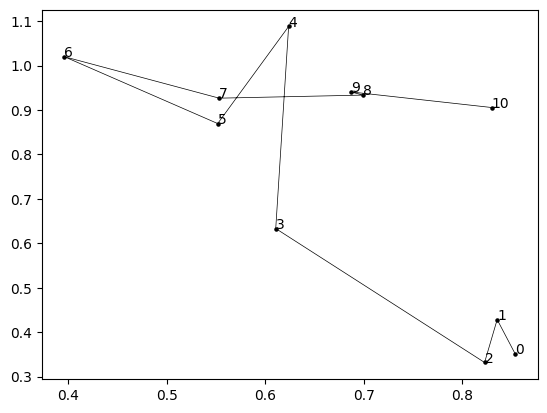

In [58]:
seq, intersect = get_seq()
print(intersect)
for i, (x, y) in enumerate(seq):
    plt.scatter(x, y, color='black', s=5)
    plt.text(x, y, i)
plt.plot(seq[:, 0], seq[:, 1], color='black', linewidth=0.5)
plt.show()

False


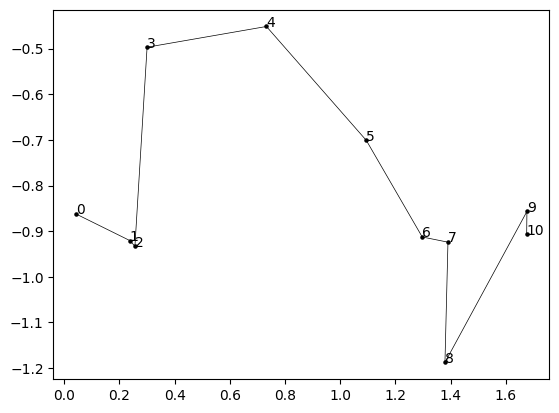

In [59]:
seq, intersect = get_seq()
print(intersect)
for i, (x, y) in enumerate(seq):
    plt.scatter(x, y, color='black', s=5)
    plt.text(x, y, i)
plt.plot(seq[:, 0], seq[:, 1], color='black', linewidth=0.5)
plt.show()

In [62]:
dataset = []

i = 0
while i < ENTRIES//2:
    print("Building dataset (intersect): ", i, "/", ENTRIES//2, end="\r")
    seq, intersect = get_seq()
    if intersect:
        dataset.append((seq, intersect))
        i += 1
print()

i = 0
while i < ENTRIES//2:
    print("Building dataset (not intersect): ", i, "/", ENTRIES//2, end="\r")
    seq, intersect = get_seq()
    if not intersect:
        dataset.append((seq, intersect))
        i += 1


Building dataset (intersect):  4999 / 5000
